# Partie 2 : Extraction du vocabulaire (BoW)
Dans cette partie nous allons traité les points suivants :

- **Exploration préliminaire des jeux de données**
    - Quelle est la taille d'origine du vocabulaire?
    - Que reste-t-il si on ne garde que les 100 mots les plus fréquents? [word cloud]
    - Quels sont les 100 mots dont la fréquence documentaire est la plus grande? [word cloud]
    - Quels sont les 100 mots les plus discriminants au sens de odds ratio? [word cloud]
    - Quelle est la distribution d'apparition des mots (Zipf)
    - Quels sont les 100 bigrammes/trigrammes les plus fréquents?

- **Variantes de BoW**
    - TF-IDF
    - Réduire la taille du vocabulaire (min_df, max_df, max_features)
    - BoW binaire
    - Bi-grams, tri-grams
    - **Quelles performances attendre ? Quels sont les avantages et les inconvénients des ces variantes?**

# Importation des bibliothéques

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import spacy 
from wordcloud import WordCloud, STOPWORDS

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import (accuracy_score,f1_score,precision_score,recall_score,roc_auc_score)
from time import time
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


import utils as ut

# Etape 0 : Chargement de données movies

Dans cette partie nous allons rechargé les données de movies afin d'effectuer l'analyse de sentiments

In [16]:
path = "../datasets/movies/movies1000/"
alltxts,alllabs = ut.load_movies(path)

Création du DataFrame

In [17]:
movies_df = pd.DataFrame()
movies_df['text'] = alltxts
movies_df['label'] = alllabs

movies_df

,text,label
0,the kids in the hall are an acquired taste . \...,0
1,capsule : a science fiction allegory . \nat th...,0
2,there is a rule when it comes to movies . \na ...,0
3,it's amazing how a comedian can have the some ...,0
4,"absolute power , the new film produced and dir...",0
...,...,...
1995,"as i walked out of crouching tiger , hidden dr...",1
1996,"when andy leaves for cowboy camp , his mother ...",1
1997,plot : a bunch of bad guys dressed up as elvis...,1
1998,trees lounge is the directoral debut from one ...,1


# Etape 3 : Extraction du vocabulaire (BoW)

## 3.1 Exploration préliminaire des jeux de données

### 3.1.1 La taille d'origine du vocabulaire

In [18]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(movies_df["text"])
print(len(vectorizer.get_feature_names_out()))

39659


### 3.1.2 Les 100 mots les plus fréquents

#### 3.1.2.1 Avec stopwords

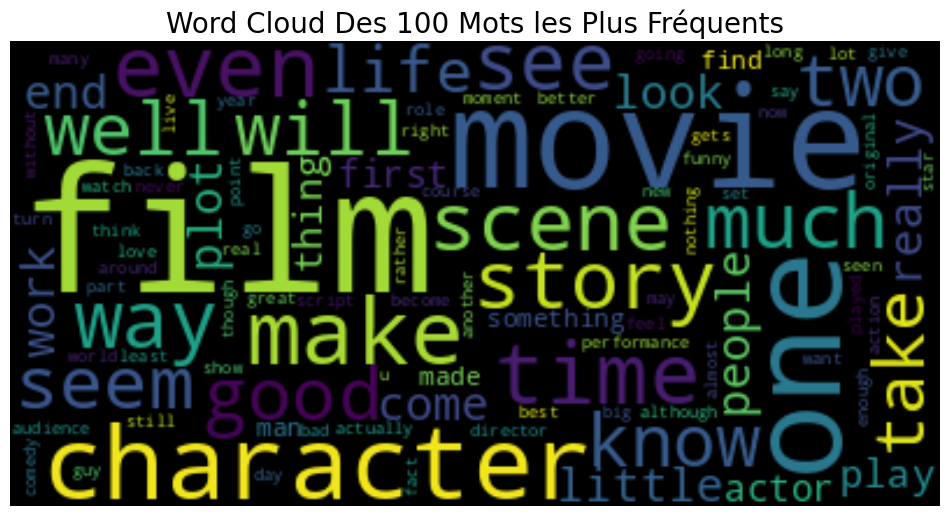

In [5]:
# Concatenate all the text from the dataframe
text = " ".join(movies_df["text"])

# Create word cloud
wordcloud = WordCloud(
    background_color='black',
    colormap='viridis',  
    max_words=100,  
    contour_width=1).generate(text)

# Plot word cloud
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud Des 100 Mots les Plus Fréquents', fontsize=20)
plt.axis('off')
plt.show()


### 3.1.3 Les 100 mots dont la fréquence documentaire est la plus grande

In [6]:
words = " ".join(movies_df["text"]).split()

# Compter les occurrences des mots
dico = Counter(words)

# Récupérer les 100 mots les plus courants
most_common_words = dict(dico.most_common(100))

print(most_common_words)

{',': 77717, 'the': 76178, '.': 65876, 'a': 37934, 'and': 35343, 'of': 33970, 'to': 31759, 'is': 25163, 'in': 21591, '"': 17612, 'that': 15105, 'it': 12289, ')': 11781, '(': 11664, 'as': 11338, 'with': 10778, 'for': 9913, 'his': 9566, 'this': 9560, 'film': 8849, 'but': 8576, 'he': 7607, 'i': 7492, 'on': 7241, 'are': 6943, 'by': 6218, 'be': 6082, 'an': 5735, 'not': 5519, 'one': 5514, 'movie': 5429, 'who': 5376, 'at': 4965, 'from': 4948, 'was': 4934, 'have': 4897, 'has': 4714, 'her': 4502, 'you': 4421, 'they': 4276, 'all': 4248, '?': 3771, "it's": 3696, 'so': 3578, 'like': 3543, 'about': 3518, 'out': 3436, 'more': 3341, 'when': 3250, 'which': 3155, 'their': 3115, 'up': 3096, 'or': 3096, 'what': 3070, ':': 3042, 'some': 2980, 'just': 2900, 'if': 2786, 'there': 2755, 'she': 2686, 'him': 2630, 'into': 2616, 'even': 2554, 'only': 2482, 'than': 2438, 'no': 2405, 'we': 2357, 'good': 2313, 'most': 2298, 'time': 2280, 'its': 2265, 'can': 2230, 'will': 2193, 'story': 2110, 'been': 2045, 'would': 

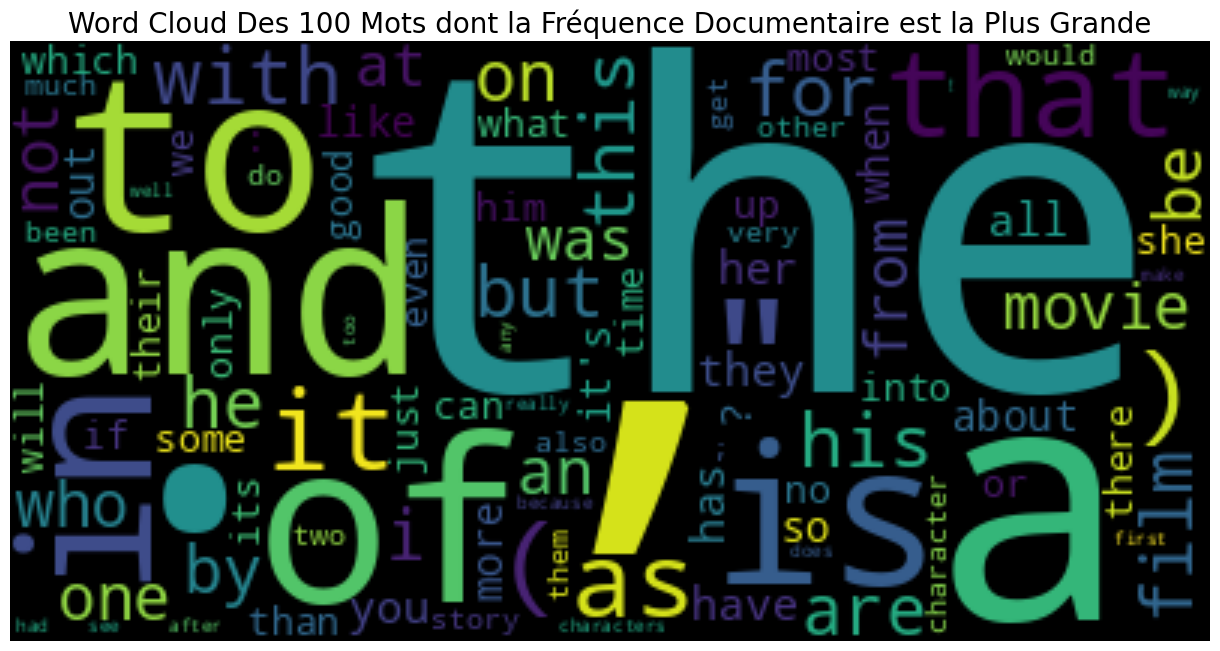

In [7]:
wordcloud = WordCloud(
    background_color = 'black',
    colormap='viridis',  
    contour_width=1).generate_from_frequencies(most_common_words)
fig = plt.figure(
    figsize = (12, 10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.title('Word Cloud Des 100 Mots dont la Fréquence Documentaire est la Plus Grande', fontsize=20)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

On remarque que la majorité des mots fréquents sont des stops words (the, and, you...) et aussi on retrouve beaucoup de ponctuation

### 3.1.4 Les 100 mots les plus discriminants au sens de odds ratio

Lorsqu'on parle de mots discriminants en termes d'odds ratio, on fait généralement référence à des mots qui sont fortement associés à une certaine catégorie ou classe par rapport à une autre. Dans ce contexte, nous comparons l'occurrence d'un mot dans une catégorie par rapport à son occurrence dans une autre catégorie.

$\text{Odds ratio}(w) = \frac{\text{Fréquence de } w \text{ dans la classe 1} *( { 1 - \text{Fréquence de } w \text{ dans la classe 0}}) }{\text{Fréquence de } w \text{ dans la classe 0} *( { 1 - \text{Fréquence de } w \text{ dans la classe 1}}) }$


In [8]:
def calculate_odds_ratios(pos_counts, neg_counts):
    odds_ratios = {}
    for word in pos_counts.keys():

        count_pos = pos_counts[word] + 0.5 # Avec une correction de Yates pour eviter les div par zerro
        count_neg = neg_counts.get(word, 0)+ 0.5
        
        total_pos = sum(pos_counts.values())
        total_neg = sum(neg_counts.values())

        odds_ratio = (count_pos * (total_neg - count_neg)) / (count_neg * (total_pos - count_pos))
        odds_ratios[word] = odds_ratio
    
    return odds_ratios

In [9]:
pos_counts =  Counter(' '.join(movies_df[movies_df['label']==1].text).split())
neg_counts = Counter(' '.join(movies_df[movies_df['label']==0].text).split())
odds_ratios = calculate_odds_ratios(pos_counts, neg_counts)

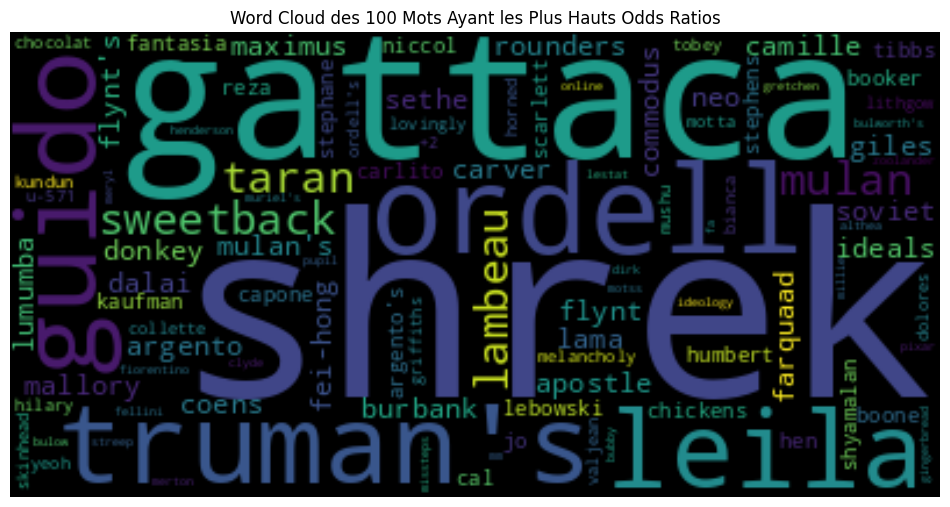

In [10]:
sorted_odds_ratios = sorted(odds_ratios.items(), key=lambda x: x[1], reverse=True)
top_100_odds_ratios = dict(sorted_odds_ratios[:100])


# Générer le nuage de mots
wc = WordCloud(
    background_color = 'black',
    colormap='viridis',  
    contour_width=1).generate_from_frequencies(top_100_odds_ratios)

# Afficher le nuage de mots
plt.figure(figsize=(12, 10))
plt.title('Word Cloud des 100 Mots Ayant les Plus Hauts Odds Ratios')
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

### 3.1.5 La distribution d'apparition des mots (Zipf)

La Loi de Zipf est une loi empirique de la distribution des fréquences des mots dans un langage naturel. Elle stipule que, dans une grande quantité de texte, la fréquence d'un mot est inversement proportionnelle à son rang dans l'ordre de fréquence. 

In [11]:
# Comptage des mots dans la colonne 'text' aprés suppresion de la ponctuationx 
movies_df["text_without_penctuation"] = movies_df['text'].apply(lambda x: ut.remove_ponctuation(x.lower())) 
word_counts = movies_df["text_without_penctuation"].str.split(expand=True).stack().value_counts()
word_counts

the               76574
a                 38109
and               35581
of                34126
to                31939
                  ...  
arangements           1
shimmer               1
plagiarize            1
perceptiveness        1
drummond              1
Name: count, Length: 39443, dtype: int64

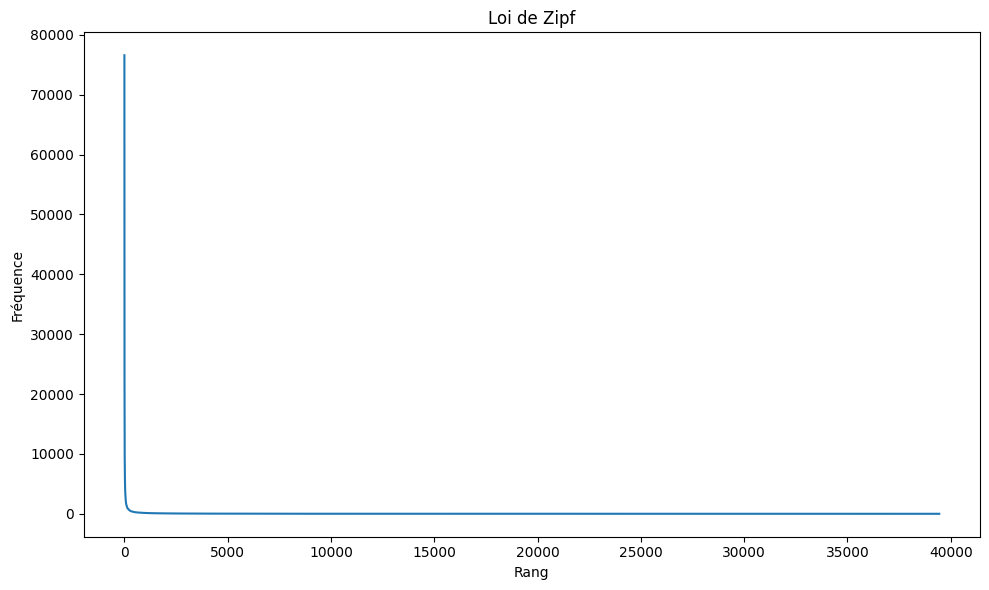

In [12]:
#Tracer le graphe de la loi de Zipf
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(1, len(word_counts) + 1), y=word_counts.values)
plt.title('Loi de Zipf')
plt.xlabel('Rang')
plt.ylabel('Fréquence')
plt.tight_layout()
plt.show()

D'aprés ce graphe, on remarque que les fréquences des mots diminuent rapidement avec leur rang. L'utilisation une échelle logarithmique dans ce graphe, nous aidera à mieux visualiser la distribution des mots et à vérifier si les données suivent la loi de Zipf.

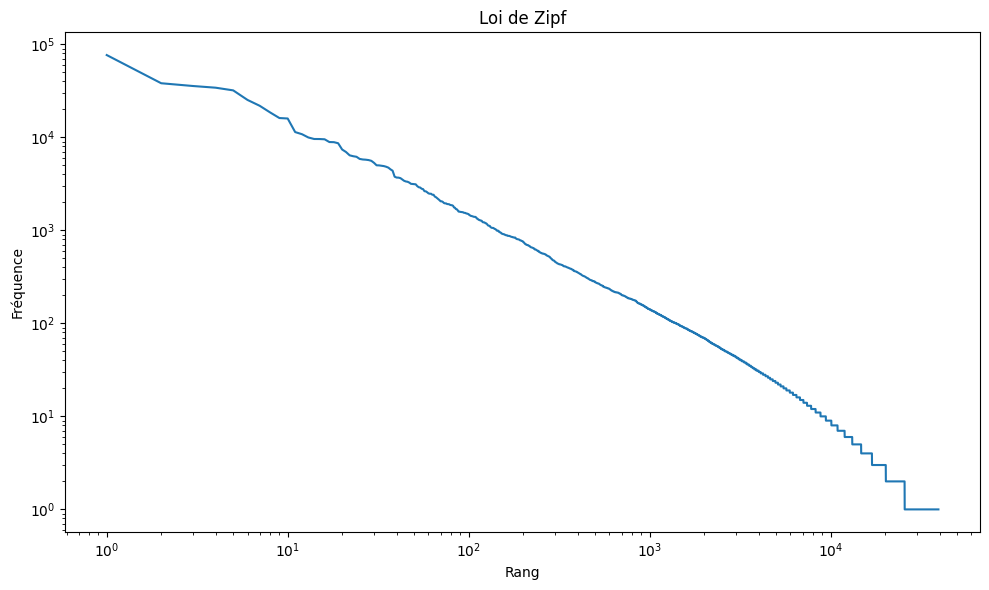

In [13]:
#Tracer le graphe de la loi de Zipf avec l'échelle logarithmique
plt.figure(figsize=(10, 6))
sns.lineplot(x=np.arange(1, len(word_counts) + 1), y=word_counts.values)
plt.title("Loi de Zipf")
plt.xlabel("Rang")
plt.ylabel("Fréquence")
plt.xscale("log")
plt.yscale("log")
plt.tight_layout()
plt.show()


### 3.1.6 Les 100 bigrammes les plus fréquents

In [ ]:
vectorizer_bigram = CountVectorizer(analyzer='word', ngram_range=(2, 2) )

# Transformer le texte en matrice de comptage des bigrammes
X2 = vectorizer_bigram.fit_transform(movies_df['text_without_penctuation'])

# Obtenir les noms des bigrammes (caractéristiques)
feature_names = vectorizer_bigram.get_feature_names_out()

# Créer un DataFrame à partir de la matrice de comptage des bigrammes
bigram_df = pd.DataFrame(X2.toarray(), columns=feature_names)

# Somme des occurrences de chaque bigramme
bigram_counts = bigram_df.sum()

# Obtenir les 100 bigrammes les plus fréquents
top_100_bigrams = bigram_counts.sort_values(ascending=False).head(100)
print(top_100_bigrams)

of the        8778
in the        5807
the film      4544
to the        2778
to be         2745
              ... 
want to        400
of them        399
would have     396
like the       395
up to          394
Length: 100, dtype: int64


#### 3.1.6.2 Sans les stop-words

In [ ]:
vectorizer_bigram_without_SW = CountVectorizer(analyzer='word', ngram_range=(2, 2) , stop_words='english')

# Transformer le texte en matrice de comptage des bigrammes
X2_without_SW = vectorizer_bigram_without_SW.fit_transform(movies_df['text_without_penctuation'])

# Obtenir les noms des bigrammes (caractéristiques)
feature_names = vectorizer_bigram_without_SW.get_feature_names_out()

# Créer un DataFrame à partir de la matrice de comptage des bigrammes
bigram_without_SW_df = pd.DataFrame(X2_without_SW.toarray(), columns=feature_names)

# Somme des occurrences de chaque bigramme
bigram_without_SW_counts = bigram_without_SW_df.sum()

# Obtenir les 100 bigrammes les plus fréquents
top_100_bigrams_witout_SW = bigram_without_SW_counts.sort_values(ascending=False).head(100)
print(top_100_bigrams_witout_SW)

special effects    387
ve seen            279
new york           250
year old           193
high school        188
                  ... 
waste time          57
haven seen          57
jim carrey          57
little bit          56
robin williams      56
Length: 100, dtype: int64


### 3.1.7 Les 100 trigrammes les plus fréquents

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Créer un vecteur CountVectorizer pour les trigrammes
vectorizer_trigram = CountVectorizer(analyzer='word', ngram_range=(3, 3))

# Transformer le texte en matrice de comptage des trigrammes
X_trigram = vectorizer_trigram.fit_transform(movies_df['text_without_penctuation'])

# Créer un DataFrame à partir de la matrice de comptage des trigrammes
trigram_df = pd.DataFrame.sparse.from_spmatrix(X_trigram, columns=vectorizer_trigram.get_feature_names_out())
f
# Somme des occurrences de chaque trigramme
trigram_counts = trigram_df.sum()

# Obtenir les 100 trigrammes les plus fréquents
top_100_trigram = trigram_counts.sort_values(ascending=False).head(100)
print(top_100_trigram)


one of the      1026
of the film      886
in the film      585
the film is      543
of the movie     375
                ... 
to make the       85
by the time       85
of the world      85
by the end        84
is the only       84
Length: 100, dtype: int64


## 3.2 Variantes de BoW

In [19]:
def fonction_eval(vectorizer,state,alltexts,alllabs):
    X = vectorizer.fit_transform(alltexts)
    [X_train, X_test, Y_train, Y_test]  = train_test_split(X, alllabs, test_size=0.2, random_state=state, shuffle=True)
    

    tps1 = time()
    #Naïve Bayes
    nb_clf = MultinomialNB()
    nb_clf.fit(X_train, Y_train)
    pred_nbt = nb_clf.predict(X_train)
    pred_nb = nb_clf.predict(X_test)
    tps2 = time()
    temps_nb = tps2 - tps1

    tps1 = time()
    #Logistic Regression
    t = 1e-8
    C=100.0
    lr_clf = LogisticRegression(random_state=0, solver='liblinear',max_iter=100, tol=t, C=C)
    lr_clf.fit(X_train, Y_train)
    pred_lrt = lr_clf.predict(X_train)
    pred_lr = lr_clf.predict(X_test)
    tps2 = time()
    temps_lr = tps2 - tps1

    tps1 = time()
    #Linear SVM
    svm_clf = LinearSVC(random_state=0)
    svm_clf.fit(X_train, Y_train)
    pred_svmt = svm_clf.predict(X_train)
    pred_svm = svm_clf.predict(X_test)
    tps2 = time()
    temps_svm = tps2 - tps1


    print("--------------------------------Resultats-----------------------------------")
    print("--------------------------------Naïve Bayes---------------------------------")
    print(f"Accuracy : \t train= {accuracy_score(Y_train, pred_nbt)}, \t test= {accuracy_score(Y_test, pred_nb)}")
    print(f"F1 score : \t train= {f1_score(Y_train, pred_nbt)}, \t test= {f1_score(Y_test, pred_nb)}")
    print(f"Précision : \t train= {precision_score(Y_train, pred_nbt)}, \t test= {precision_score(Y_test, pred_nb)}")
    print(f"Recall : \t train= {recall_score(Y_train, pred_nbt)}, \t test= {recall_score(Y_test, pred_nb)}")
    print(f"ROC AUC :  \t train= {roc_auc_score(Y_train, pred_nbt)}, \t test= {roc_auc_score(Y_test, pred_nb)}")
    print("Temps d'éxécution : ",temps_nb)

    print("\n------------------------------Logistic Regression----------------------------")
    print(f"Accuracy : \t train= {accuracy_score(Y_train, pred_lrt)}, \t test= {accuracy_score(Y_test, pred_lr)}")
    print(f"F1 score : \t train= {f1_score(Y_train, pred_lrt)}, \t test= {f1_score(Y_test, pred_lr)}")
    print(f"Précision : \t train= {precision_score(Y_train, pred_lrt)}, \t test= {precision_score(Y_test, pred_lr)}")
    print(f"Recall : \t train= {recall_score(Y_train, pred_lrt)}, \t test= {recall_score(Y_test, pred_lr)}")
    print(f"ROC AUC : \t train= {roc_auc_score(Y_train, pred_lrt)}, \t test= {roc_auc_score(Y_test, pred_lr)}")
    print("Temps d'éxécution : ",temps_lr)

    print("\n----------------------------------SVM----------------------------------------")
    print(f"Accuracy : \t train= {accuracy_score(Y_train, pred_svmt)}, \t test= {accuracy_score(Y_test, pred_svm)}")
    print(f"F1 score : \t train= {f1_score(Y_train, pred_svmt)}, \t test= {f1_score(Y_test, pred_svm)}")
    print(f"Précision : \t train= {precision_score(Y_train, pred_svmt)}, \t test= {precision_score(Y_test, pred_svm)}")
    print(f"Recall : \t train= {recall_score(Y_train, pred_svmt)}, \t test= {recall_score(Y_test, pred_svm)}")
    print(f"ROC AUC : \t train= {roc_auc_score(Y_train, pred_svmt)}, \t test= {roc_auc_score(Y_test, pred_svm)}")
    print("Temps d'éxécution : ",temps_svm)


### 3.2.1 TF-IDF :

-   Sans aucun prétraitement

In [20]:
vectorizer_tf_idf = TfidfVectorizer()
fonction_eval(vectorizer_tf_idf,10,movies_df.text,movies_df.label)


--------------------------------Resultats-----------------------------------
--------------------------------Naïve Bayes---------------------------------
Accuracy : 	 train= 0.97, 	 test= 0.8075
F1 score : 	 train= 0.9696969696969697, 	 test= 0.8010335917312661
Précision : 	 train= 0.9858793324775353, 	 test= 0.8072916666666666
Recall : 	 train= 0.9540372670807453, 	 test= 0.7948717948717948
ROC AUC :  	 train= 0.970100394546662, 	 test= 0.807191994996873
Temps d'éxécution :  0.018587350845336914

------------------------------Logistic Regression----------------------------
Accuracy : 	 train= 1.0, 	 test= 0.8325
F1 score : 	 train= 1.0, 	 test= 0.8320802005012532
Précision : 	 train= 1.0, 	 test= 0.8137254901960784
Recall : 	 train= 1.0, 	 test= 0.8512820512820513
ROC AUC : 	 train= 1.0, 	 test= 0.8329580988117574
Temps d'éxécution :  1.024721384048462

----------------------------------SVM----------------------------------------
Accuracy : 	 train= 1.0, 	 test= 0.8325
F1 score : 	 tr

-   Suppression de la ponctuation

In [21]:
vectorizer_tf_idf_reduced = TfidfVectorizer(preprocessor=ut.remove_ponctuation)
fonction_eval(vectorizer_tf_idf_reduced,10,movies_df.text,movies_df.label)

--------------------------------Resultats-----------------------------------
--------------------------------Naïve Bayes---------------------------------
Accuracy : 	 train= 0.96875, 	 test= 0.81
F1 score : 	 train= 0.9684343434343433, 	 test= 0.8020833333333333
Précision : 	 train= 0.9845956354300385, 	 test= 0.8148148148148148
Recall : 	 train= 0.9527950310559006, 	 test= 0.7897435897435897
ROC AUC :  	 train= 0.9688503457166296, 	 test= 0.8095059412132583
Temps d'éxécution :  0.017621278762817383

------------------------------Logistic Regression----------------------------
Accuracy : 	 train= 1.0, 	 test= 0.8325
F1 score : 	 train= 1.0, 	 test= 0.8312342569269521
Précision : 	 train= 1.0, 	 test= 0.8168316831683168
Recall : 	 train= 1.0, 	 test= 0.8461538461538461
ROC AUC : 	 train= 1.0, 	 test= 0.8328330206378988
Temps d'éxécution :  0.8473999500274658

----------------------------------SVM----------------------------------------
Accuracy : 	 train= 1.0, 	 test= 0.835
F1 score : 	

<span style="color:red">On remarque que la suppression de la ponctuation n'ajoute pas d'amélioration</span>

-   Suppression des chiffres

In [22]:
vectorizer_tf_idf_reduced = TfidfVectorizer(preprocessor=ut.remove_numbers)
fonction_eval(vectorizer_tf_idf_reduced,10,movies_df.text,movies_df.label)

--------------------------------Resultats-----------------------------------
--------------------------------Naïve Bayes---------------------------------
Accuracy : 	 train= 0.969375, 	 test= 0.805
F1 score : 	 train= 0.969046114971573, 	 test= 0.7979274611398963
Précision : 	 train= 0.9858611825192802, 	 test= 0.806282722513089
Recall : 	 train= 0.9527950310559006, 	 test= 0.7897435897435897
ROC AUC :  	 train= 0.9694792765342396, 	 test= 0.8046278924327704
Temps d'éxécution :  0.014886140823364258

------------------------------Logistic Regression----------------------------
Accuracy : 	 train= 1.0, 	 test= 0.83
F1 score : 	 train= 1.0, 	 test= 0.8300000000000001
Précision : 	 train= 1.0, 	 test= 0.8097560975609757
Recall : 	 train= 1.0, 	 test= 0.8512820512820513
ROC AUC : 	 train= 1.0, 	 test= 0.8305190744215135
Temps d'éxécution :  0.8911781311035156

----------------------------------SVM----------------------------------------
Accuracy : 	 train= 1.0, 	 test= 0.8375
F1 score : 	 

<span style="color:red">On remarque que la suppression des chiffres n'ajoute pas d'amélioration</span>

-   Suppression des Stops Words

In [23]:
vectorizer_tf_idf_reduced = TfidfVectorizer(stop_words='english')
fonction_eval(vectorizer_tf_idf_reduced,10,movies_df.text,movies_df.label)

--------------------------------Resultats-----------------------------------
--------------------------------Naïve Bayes---------------------------------
Accuracy : 	 train= 0.973125, 	 test= 0.7925
F1 score : 	 train= 0.9730407523510972, 	 test= 0.7898734177215191
Précision : 	 train= 0.9822784810126582, 	 test= 0.78
Recall : 	 train= 0.9639751552795031, 	 test= 0.8
ROC AUC :  	 train= 0.9731825461932107, 	 test= 0.7926829268292683
Temps d'éxécution :  0.01254582405090332

------------------------------Logistic Regression----------------------------
Accuracy : 	 train= 1.0, 	 test= 0.84
F1 score : 	 train= 1.0, 	 test= 0.8391959798994976
Précision : 	 train= 1.0, 	 test= 0.8226600985221675
Recall : 	 train= 1.0, 	 test= 0.8564102564102564
ROC AUC : 	 train= 1.0, 	 test= 0.8404002501563478
Temps d'éxécution :  0.7016375064849854

----------------------------------SVM----------------------------------------
Accuracy : 	 train= 1.0, 	 test= 0.835
F1 score : 	 train= 1.0, 	 test= 0.834170

<span style="color:green">On remarque que la suppression des stop-words ajoute une petite amélioration au modéle Régression Logistique et SVM, contrairement à Naive Bayes</span>

-   Miniscule

In [24]:
vectorizer_tf_idf_reduced = TfidfVectorizer(lowercase=True)
fonction_eval(vectorizer_tf_idf_reduced,10,movies_df.text,movies_df.label)

--------------------------------Resultats-----------------------------------
--------------------------------Naïve Bayes---------------------------------
Accuracy : 	 train= 0.97, 	 test= 0.8075
F1 score : 	 train= 0.9696969696969697, 	 test= 0.8010335917312661
Précision : 	 train= 0.9858793324775353, 	 test= 0.8072916666666666
Recall : 	 train= 0.9540372670807453, 	 test= 0.7948717948717948
ROC AUC :  	 train= 0.970100394546662, 	 test= 0.807191994996873
Temps d'éxécution :  0.018059253692626953

------------------------------Logistic Regression----------------------------
Accuracy : 	 train= 1.0, 	 test= 0.8325
F1 score : 	 train= 1.0, 	 test= 0.8320802005012532
Précision : 	 train= 1.0, 	 test= 0.8137254901960784
Recall : 	 train= 1.0, 	 test= 0.8512820512820513
ROC AUC : 	 train= 1.0, 	 test= 0.8329580988117574
Temps d'éxécution :  0.936415433883667

----------------------------------SVM----------------------------------------
Accuracy : 	 train= 1.0, 	 test= 0.8325
F1 score : 	 tr

<span style="color:red">On remarque que le fait de tous mettre en miniscule ne rajoute pas d'amélioration</span>

-   Stemming

In [39]:
vectorizer_tf_idf_reduced = TfidfVectorizer(preprocessor=ut.stemming_En)
fonction_eval(vectorizer_tf_idf_reduced,10,movies_df.text,movies_df.label)

--------------------------------Resultats-----------------------------------
--------------------------------Naïve Bayes---------------------------------
Accuracy : 	 train= 0.956875, 	 test= 0.8
F1 score : 	 train= 0.9564118761844599, 	 test= 0.7938144329896906
Précision : 	 train= 0.9730077120822622, 	 test= 0.7979274611398963
Recall : 	 train= 0.9403726708074535, 	 test= 0.7897435897435897
ROC AUC :  	 train= 0.9569787882339155, 	 test= 0.7997498436522826
Temps d'éxécution :  0.011464834213256836

------------------------------Logistic Regression----------------------------
Accuracy : 	 train= 1.0, 	 test= 0.8375
F1 score : 	 train= 1.0, 	 test= 0.8354430379746836
Précision : 	 train= 1.0, 	 test= 0.825
Recall : 	 train= 1.0, 	 test= 0.8461538461538461
ROC AUC : 	 train= 1.0, 	 test= 0.8377110694183866
Temps d'éxécution :  0.984260082244873

----------------------------------SVM----------------------------------------
Accuracy : 	 train= 1.0, 	 test= 0.8425
F1 score : 	 train= 1.0, 

<span style="color:green">On remarque une légére amélioration pour les modéles de Régression Linéaire et SVM</span>

-   Lemmatisation

In [40]:
vectorizer_tf_idf_reduced = TfidfVectorizer(preprocessor=ut.lemmatization)
fonction_eval(vectorizer_tf_idf_reduced,10,movies_df.text,movies_df.label)

--------------------------------Resultats-----------------------------------
--------------------------------Naïve Bayes---------------------------------
Accuracy : 	 train= 0.965, 	 test= 0.795
F1 score : 	 train= 0.9646464646464645, 	 test= 0.7864583333333334
Précision : 	 train= 0.9807445442875481, 	 test= 0.798941798941799
Recall : 	 train= 0.9490683229813665, 	 test= 0.7743589743589744
ROC AUC :  	 train= 0.9651001992265323, 	 test= 0.794496560350219
Temps d'éxécution :  0.013633489608764648

------------------------------Logistic Regression----------------------------
Accuracy : 	 train= 1.0, 	 test= 0.8525
F1 score : 	 train= 1.0, 	 test= 0.8498727735368956
Précision : 	 train= 1.0, 	 test= 0.8434343434343434
Recall : 	 train= 1.0, 	 test= 0.8564102564102564
ROC AUC : 	 train= 1.0, 	 test= 0.8525953721075672
Temps d'éxécution :  0.9418942928314209

----------------------------------SVM----------------------------------------
Accuracy : 	 train= 1.0, 	 test= 0.845
F1 score : 	 tr

<span style="color:green">On remarque une légére amélioration pour les modéles de Régression Linéaire et SVM</span>

-   Réduction de la taille du vocabulaire : 

In [35]:
min_df=5             
max_df=10000
max_features=20000
vectorizer_tf_idf_reduced = TfidfVectorizer(stop_words='english',min_df=min_df, max_df=max_df, max_features=max_features)
fonction_eval(vectorizer_tf_idf_reduced,10,movies_df.text,movies_df.label)


--------------------------------Resultats-----------------------------------
--------------------------------Naïve Bayes---------------------------------
Accuracy : 	 train= 0.950625, 	 test= 0.79
F1 score : 	 train= 0.9502205419029616, 	 test= 0.7846153846153847
Précision : 	 train= 0.9641943734015346, 	 test= 0.7846153846153846
Recall : 	 train= 0.9366459627329192, 	 test= 0.7846153846153846
ROC AUC :  	 train= 0.9507129184733778, 	 test= 0.7898686679174485
Temps d'éxécution :  0.00737309455871582

------------------------------Logistic Regression----------------------------
Accuracy : 	 train= 1.0, 	 test= 0.835
F1 score : 	 train= 1.0, 	 test= 0.8366336633663366
Précision : 	 train= 1.0, 	 test= 0.8086124401913876
Recall : 	 train= 1.0, 	 test= 0.8666666666666667
ROC AUC : 	 train= 1.0, 	 test= 0.8357723577235774
Temps d'éxécution :  0.5167200565338135

----------------------------------SVM----------------------------------------
Accuracy : 	 train= 1.0, 	 test= 0.835
F1 score : 	 

<span style="color:green">On remarque une légére amélioration dans le modéle Régression Logistique et SVM, contrairement à Naive Bayes</span>

- Binary Bow :

In [36]:
min_df=5             
max_df=10000
max_features=20000
vectorizer_tf_idf_reduced = TfidfVectorizer(stop_words='english',min_df=min_df, max_df=max_df, max_features=max_features , binary=True)
fonction_eval(vectorizer_tf_idf_reduced,10,movies_df.text,movies_df.label)


--------------------------------Resultats-----------------------------------
--------------------------------Naïve Bayes---------------------------------
Accuracy : 	 train= 0.9625, 	 test= 0.8175
F1 score : 	 train= 0.9625468164794009, 	 test= 0.8123393316195373
Précision : 	 train= 0.9673776662484316, 	 test= 0.8144329896907216
Recall : 	 train= 0.9577639751552796, 	 test= 0.8102564102564103
ROC AUC :  	 train= 0.9625297863197781, 	 test= 0.8173233270794247
Temps d'éxécution :  0.013248682022094727

------------------------------Logistic Regression----------------------------
Accuracy : 	 train= 1.0, 	 test= 0.875
F1 score : 	 train= 1.0, 	 test= 0.8743718592964823
Précision : 	 train= 1.0, 	 test= 0.8571428571428571
Recall : 	 train= 1.0, 	 test= 0.8923076923076924
ROC AUC : 	 train= 1.0, 	 test= 0.875422138836773
Temps d'éxécution :  0.3205444812774658

----------------------------------SVM----------------------------------------
Accuracy : 	 train= 1.0, 	 test= 0.8675
F1 score : 	

<span style="color:green">On remarque une amélioration significative dans les trois modéle Régression Logistique, SVM et Naive Bayes</span>

-   Bi-grams :

In [42]:
vectorizer_tf_idf_bigram = TfidfVectorizer(ngram_range=(2,2))
fonction_eval(vectorizer_tf_idf_bigram,10,alltxts,alllabs)

--------------------------------Resultats-----------------------------------
--------------------------------Naïve Bayes---------------------------------
Accuracy : 	 train= 1.0, 	 test= 0.795
F1 score : 	 train= 1.0, 	 test= 0.8101851851851852
Précision : 	 train= 1.0, 	 test= 0.7383966244725738
Recall : 	 train= 1.0, 	 test= 0.8974358974358975
ROC AUC :  	 train= 1.0, 	 test= 0.7974984365228267
Temps d'éxécution :  0.0956878662109375

------------------------------Logistic Regression----------------------------
Accuracy : 	 train= 1.0, 	 test= 0.8275
F1 score : 	 train= 1.0, 	 test= 0.8253164556962025
Précision : 	 train= 1.0, 	 test= 0.815
Recall : 	 train= 1.0, 	 test= 0.8358974358974359
ROC AUC : 	 train= 1.0, 	 test= 0.8277048155096937
Temps d'éxécution :  2.0774059295654297

----------------------------------SVM----------------------------------------
Accuracy : 	 train= 1.0, 	 test= 0.825
F1 score : 	 train= 1.0, 	 test= 0.8223350253807108
Précision : 	 train= 1.0, 	 test= 0.81

<span style="color:green">On remarque une amélioration que pour les métriques suivantes : Recall et ROC AUC </span>

-   Tri-grams :

In [43]:
vectorizer_tf_idf_trigram = TfidfVectorizer(ngram_range=(3,3))
fonction_eval(vectorizer_tf_idf_trigram,10,movies_df.text,movies_df.label)

--------------------------------Resultats-----------------------------------
--------------------------------Naïve Bayes---------------------------------
Accuracy : 	 train= 1.0, 	 test= 0.8275
F1 score : 	 train= 1.0, 	 test= 0.8217054263565892
Précision : 	 train= 1.0, 	 test= 0.828125
Recall : 	 train= 1.0, 	 test= 0.8153846153846154
ROC AUC :  	 train= 1.0, 	 test= 0.8272045028142588
Temps d'éxécution :  0.38789892196655273

------------------------------Logistic Regression----------------------------
Accuracy : 	 train= 1.0, 	 test= 0.78
F1 score : 	 train= 1.0, 	 test= 0.7800000000000001
Précision : 	 train= 1.0, 	 test= 0.7609756097560976
Recall : 	 train= 1.0, 	 test= 0.8
ROC AUC : 	 train= 1.0, 	 test= 0.7804878048780488
Temps d'éxécution :  3.9272661209106445

----------------------------------SVM----------------------------------------
Accuracy : 	 train= 1.0, 	 test= 0.78
F1 score : 	 train= 1.0, 	 test= 0.7800000000000001
Précision : 	 train= 1.0, 	 test= 0.760975609756097

- Binary Bow et Lemmatisation :

In [44]:
min_df=5             
max_df=10000
max_features=20000
vectorizer_tf_idf_reduced = TfidfVectorizer(preprocessor=ut.lemmatization,stop_words='english',min_df=min_df, max_df=max_df, max_features=max_features , binary=True)
fonction_eval(vectorizer_tf_idf_reduced,10,movies_df.text,movies_df.label)


/home/anyes/.local/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'wa'] not in stop_words.
  warnings.warn(


--------------------------------Resultats-----------------------------------
--------------------------------Naïve Bayes---------------------------------
Accuracy : 	 train= 0.961875, 	 test= 0.8325
F1 score : 	 train= 0.9619463505926389, 	 test= 0.8312342569269521
Précision : 	 train= 0.9661654135338346, 	 test= 0.8168316831683168
Recall : 	 train= 0.9577639751552796, 	 test= 0.8461538461538461
ROC AUC :  	 train= 0.9619008555021681, 	 test= 0.8328330206378988
Temps d'éxécution :  0.008355140686035156

------------------------------Logistic Regression----------------------------
Accuracy : 	 train= 1.0, 	 test= 0.8675
F1 score : 	 train= 1.0, 	 test= 0.8684863523573202
Précision : 	 train= 1.0, 	 test= 0.8413461538461539
Recall : 	 train= 1.0, 	 test= 0.8974358974358975
ROC AUC : 	 train= 1.0, 	 test= 0.8682301438398999
Temps d'éxécution :  0.4093024730682373

----------------------------------SVM----------------------------------------
Accuracy : 	 train= 1.0, 	 test= 0.87
F1 score :

<span style="color:green">On remarque une grande amélioration pour tous les modéles</span>

### 3.2.2 CountVectorizer :

-   Sans aucun prétraitement

In [45]:
countvectorizer = CountVectorizer()
fonction_eval(countvectorizer,10,movies_df.text,movies_df.label)


--------------------------------Resultats-----------------------------------
--------------------------------Naïve Bayes---------------------------------
Accuracy : 	 train= 0.97375, 	 test= 0.805
F1 score : 	 train= 0.9735516372795969, 	 test= 0.7989690721649483
Précision : 	 train= 0.9872286079182631, 	 test= 0.8031088082901554
Recall : 	 train= 0.9602484472049689, 	 test= 0.7948717948717948
ROC AUC :  	 train= 0.9738349154263839, 	 test= 0.8047529706066292
Temps d'éxécution :  0.011469125747680664

------------------------------Logistic Regression----------------------------
Accuracy : 	 train= 1.0, 	 test= 0.8225
F1 score : 	 train= 1.0, 	 test= 0.8193384223918575
Précision : 	 train= 1.0, 	 test= 0.8131313131313131
Recall : 	 train= 1.0, 	 test= 0.8256410256410256
ROC AUC : 	 train= 1.0, 	 test= 0.8225766103814884
Temps d'éxécution :  3.378937244415283

----------------------------------SVM----------------------------------------
Accuracy : 	 train= 1.0, 	 test= 0.8275
F1 score : 

<span style="color:red">On remarque que le CountVectorizer est plus lent et moins erformant que TfIdfVerctorizer</span>

-   Suppression de la ponctuation

In [46]:
countvect_reduced = CountVectorizer(preprocessor=ut.remove_ponctuation)
fonction_eval(countvect_reduced,10,movies_df.text,movies_df.label)

--------------------------------Resultats-----------------------------------
--------------------------------Naïve Bayes---------------------------------
Accuracy : 	 train= 0.973125, 	 test= 0.805
F1 score : 	 train= 0.9729389553178099, 	 test= 0.7989690721649483
Précision : 	 train= 0.985969387755102, 	 test= 0.8031088082901554
Recall : 	 train= 0.9602484472049689, 	 test= 0.7948717948717948
ROC AUC :  	 train= 0.9732059846087738, 	 test= 0.8047529706066292
Temps d'éxécution :  0.02157306671142578

------------------------------Logistic Regression----------------------------
Accuracy : 	 train= 1.0, 	 test= 0.8275
F1 score : 	 train= 1.0, 	 test= 0.8244274809160306
Précision : 	 train= 1.0, 	 test= 0.8181818181818182
Recall : 	 train= 1.0, 	 test= 0.8307692307692308
ROC AUC : 	 train= 1.0, 	 test= 0.827579737335835
Temps d'éxécution :  3.7032389640808105

----------------------------------SVM----------------------------------------
Accuracy : 	 train= 1.0, 	 test= 0.825
F1 score : 	 

-   Suppression des chiffres

In [47]:
countvect_reduced = CountVectorizer(preprocessor=ut.remove_numbers)
fonction_eval(countvect_reduced,10,movies_df.text,movies_df.label)

--------------------------------Resultats-----------------------------------
--------------------------------Naïve Bayes---------------------------------
Accuracy : 	 train= 0.9725, 	 test= 0.8025
F1 score : 	 train= 0.9722921914357683, 	 test= 0.7958656330749354
Précision : 	 train= 0.9859514687100894, 	 test= 0.8020833333333334
Recall : 	 train= 0.9590062111801242, 	 test= 0.7897435897435897
ROC AUC :  	 train= 0.9725848665963513, 	 test= 0.8021888680425265
Temps d'éxécution :  0.014419794082641602

------------------------------Logistic Regression----------------------------
Accuracy : 	 train= 1.0, 	 test= 0.8275
F1 score : 	 train= 1.0, 	 test= 0.8253164556962025
Précision : 	 train= 1.0, 	 test= 0.815
Recall : 	 train= 1.0, 	 test= 0.8358974358974359
ROC AUC : 	 train= 1.0, 	 test= 0.8277048155096937
Temps d'éxécution :  3.2717337608337402

----------------------------------SVM----------------------------------------
Accuracy : 	 train= 1.0, 	 test= 0.8225
F1 score : 	 train= 1.0

-   Suppression des Stops Words

In [48]:
countvect_reduced = CountVectorizer(stop_words='english')
fonction_eval(countvect_reduced,10,movies_df.text,movies_df.label)

--------------------------------Resultats-----------------------------------
--------------------------------Naïve Bayes---------------------------------
Accuracy : 	 train= 0.978125, 	 test= 0.7925
F1 score : 	 train= 0.9780012570710245, 	 test= 0.7844155844155845
Précision : 	 train= 0.989821882951654, 	 test= 0.7947368421052632
Recall : 	 train= 0.9664596273291925, 	 test= 0.7743589743589744
ROC AUC :  	 train= 0.9781983671237158, 	 test= 0.7920575359599751
Temps d'éxécution :  0.01567697525024414

------------------------------Logistic Regression----------------------------
Accuracy : 	 train= 1.0, 	 test= 0.8325
F1 score : 	 train= 1.0, 	 test= 0.8286445012787724
Précision : 	 train= 1.0, 	 test= 0.826530612244898
Recall : 	 train= 1.0, 	 test= 0.8307692307692308
ROC AUC : 	 train= 1.0, 	 test= 0.8324577861163227
Temps d'éxécution :  1.874335527420044

----------------------------------SVM----------------------------------------
Accuracy : 	 train= 1.0, 	 test= 0.8175
F1 score : 	

-   Miniscule

In [49]:
countvect_reduced = CountVectorizer(lowercase=True)
fonction_eval(countvect_reduced,10,movies_df.text,movies_df.label)

--------------------------------Resultats-----------------------------------
--------------------------------Naïve Bayes---------------------------------
Accuracy : 	 train= 0.97375, 	 test= 0.805
F1 score : 	 train= 0.9735516372795969, 	 test= 0.7989690721649483
Précision : 	 train= 0.9872286079182631, 	 test= 0.8031088082901554
Recall : 	 train= 0.9602484472049689, 	 test= 0.7948717948717948
ROC AUC :  	 train= 0.9738349154263839, 	 test= 0.8047529706066292
Temps d'éxécution :  0.023256778717041016

------------------------------Logistic Regression----------------------------
Accuracy : 	 train= 1.0, 	 test= 0.8225
F1 score : 	 train= 1.0, 	 test= 0.8193384223918575
Précision : 	 train= 1.0, 	 test= 0.8131313131313131
Recall : 	 train= 1.0, 	 test= 0.8256410256410256
ROC AUC : 	 train= 1.0, 	 test= 0.8225766103814884
Temps d'éxécution :  2.6959965229034424

----------------------------------SVM----------------------------------------
Accuracy : 	 train= 1.0, 	 test= 0.8275
F1 score :

-   Stemming

In [50]:
countvect_reduced = CountVectorizer(preprocessor=ut.stemming_En)
fonction_eval(countvect_reduced,10,movies_df.text,movies_df.label)

--------------------------------Resultats-----------------------------------
--------------------------------Naïve Bayes---------------------------------
Accuracy : 	 train= 0.961875, 	 test= 0.7975
F1 score : 	 train= 0.9614655716993051, 	 test= 0.7896103896103895
Précision : 	 train= 0.9781491002570694, 	 test= 0.8
Recall : 	 train= 0.9453416149068323, 	 test= 0.7794871794871795
ROC AUC :  	 train= 0.9619789835540451, 	 test= 0.7970606629143214
Temps d'éxécution :  0.013239145278930664

------------------------------Logistic Regression----------------------------
Accuracy : 	 train= 1.0, 	 test= 0.8125
F1 score : 	 train= 1.0, 	 test= 0.8010610079575596
Précision : 	 train= 1.0, 	 test= 0.8296703296703297
Recall : 	 train= 1.0, 	 test= 0.7743589743589744
ROC AUC : 	 train= 1.0, 	 test= 0.8115697310819262
Temps d'éxécution :  3.218205690383911

----------------------------------SVM----------------------------------------
Accuracy : 	 train= 1.0, 	 test= 0.81
F1 score : 	 train= 1.0, 	

-   Lemmatisation

In [51]:
countvect_reduced = CountVectorizer(preprocessor=ut.lemmatization)
fonction_eval(countvect_reduced,10,movies_df.text,movies_df.label)

--------------------------------Resultats-----------------------------------
--------------------------------Naïve Bayes---------------------------------
Accuracy : 	 train= 0.9725, 	 test= 0.805
F1 score : 	 train= 0.9722921914357683, 	 test= 0.7958115183246073
Précision : 	 train= 0.9859514687100894, 	 test= 0.8128342245989305
Recall : 	 train= 0.9590062111801242, 	 test= 0.7794871794871795
ROC AUC :  	 train= 0.9725848665963513, 	 test= 0.804377736085053
Temps d'éxécution :  0.0164642333984375

------------------------------Logistic Regression----------------------------
Accuracy : 	 train= 1.0, 	 test= 0.8325
F1 score : 	 train= 1.0, 	 test= 0.825974025974026
Précision : 	 train= 1.0, 	 test= 0.8368421052631579
Recall : 	 train= 1.0, 	 test= 0.8153846153846154
ROC AUC : 	 train= 1.0, 	 test= 0.8320825515947468
Temps d'éxécution :  3.1313986778259277

----------------------------------SVM----------------------------------------
Accuracy : 	 train= 1.0, 	 test= 0.8125
F1 score : 	 tr

-   Réduction de la taille du vocabulaire : 

In [52]:
min_df=5             
max_df=10000
max_features=20000
countvect_reduced = CountVectorizer(stop_words='english',min_df=min_df, max_df=max_df, max_features=max_features)
fonction_eval(countvect_reduced,10,movies_df.text,movies_df.label)


--------------------------------Resultats-----------------------------------
--------------------------------Naïve Bayes---------------------------------
Accuracy : 	 train= 0.946875, 	 test= 0.7975
F1 score : 	 train= 0.9461684610512984, 	 test= 0.7906976744186046
Précision : 	 train= 0.9651162790697675, 	 test= 0.796875
Recall : 	 train= 0.9279503105590062, 	 test= 0.7846153846153846
ROC AUC :  	 train= 0.9469940232040314, 	 test= 0.7971857410881801
Temps d'éxécution :  0.009756803512573242

------------------------------Logistic Regression----------------------------
Accuracy : 	 train= 1.0, 	 test= 0.8375
F1 score : 	 train= 1.0, 	 test= 0.8346055979643766
Précision : 	 train= 1.0, 	 test= 0.8282828282828283
Recall : 	 train= 1.0, 	 test= 0.841025641025641
ROC AUC : 	 train= 1.0, 	 test= 0.8375859912445278
Temps d'éxécution :  1.697741985321045

----------------------------------SVM----------------------------------------
Accuracy : 	 train= 1.0, 	 test= 0.825
F1 score : 	 train= 1

- Binary Bow :

In [53]:
min_df=5             
max_df=10000
max_features=20000
countvect_reduced = CountVectorizer(stop_words='english',min_df=min_df, max_df=max_df, max_features=max_features , binary=True)
fonction_eval(countvect_reduced,10,movies_df.text,movies_df.label)


--------------------------------Resultats-----------------------------------
--------------------------------Naïve Bayes---------------------------------
Accuracy : 	 train= 0.965625, 	 test= 0.805
F1 score : 	 train= 0.965255843335439, 	 test= 0.7989690721649483
Précision : 	 train= 0.9820051413881749, 	 test= 0.8031088082901554
Recall : 	 train= 0.9490683229813665, 	 test= 0.7948717948717948
ROC AUC :  	 train= 0.9657291300441424, 	 test= 0.8047529706066292
Temps d'éxécution :  0.01080012321472168

------------------------------Logistic Regression----------------------------
Accuracy : 	 train= 1.0, 	 test= 0.8625
F1 score : 	 train= 1.0, 	 test= 0.8600508905852418
Précision : 	 train= 1.0, 	 test= 0.8535353535353535
Recall : 	 train= 1.0, 	 test= 0.8666666666666667
ROC AUC : 	 train= 1.0, 	 test= 0.8626016260162601
Temps d'éxécution :  1.1838502883911133

----------------------------------SVM----------------------------------------
Accuracy : 	 train= 1.0, 	 test= 0.8575
F1 score : 

/home/anyes/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-   Bi-grams :

In [54]:
countvect_bigram = CountVectorizer(ngram_range=(2,2))
fonction_eval(countvect_bigram,10,alltxts,alllabs)

--------------------------------Resultats-----------------------------------
--------------------------------Naïve Bayes---------------------------------
Accuracy : 	 train= 1.0, 	 test= 0.8225
F1 score : 	 train= 1.0, 	 test= 0.8220551378446116
Précision : 	 train= 1.0, 	 test= 0.803921568627451
Recall : 	 train= 1.0, 	 test= 0.841025641025641
ROC AUC :  	 train= 1.0, 	 test= 0.8229518449030645
Temps d'éxécution :  0.127577543258667

------------------------------Logistic Regression----------------------------
Accuracy : 	 train= 1.0, 	 test= 0.7925
F1 score : 	 train= 1.0, 	 test= 0.7855297157622739
Précision : 	 train= 1.0, 	 test= 0.7916666666666666
Recall : 	 train= 1.0, 	 test= 0.7794871794871795
ROC AUC : 	 train= 1.0, 	 test= 0.7921826141338337
Temps d'éxécution :  9.304688453674316

----------------------------------SVM----------------------------------------
Accuracy : 	 train= 1.0, 	 test= 0.7975
F1 score : 	 train= 1.0, 	 test= 0.7896103896103895
Précision : 	 train= 1.0, 	

<span style="color:green">On remarque une amélioration pour le modéle Naive Bayes comparant à TfIdf </span>

-   Tri-grams :

In [55]:
countvect_trigram = CountVectorizer(ngram_range=(3,3))
fonction_eval(countvect_trigram,10,movies_df.text,movies_df.label)

--------------------------------Resultats-----------------------------------
--------------------------------Naïve Bayes---------------------------------
Accuracy : 	 train= 1.0, 	 test= 0.725
F1 score : 	 train= 1.0, 	 test= 0.6283783783783784
Précision : 	 train= 1.0, 	 test= 0.9207920792079208
Recall : 	 train= 1.0, 	 test= 0.47692307692307695
ROC AUC :  	 train= 1.0, 	 test= 0.7189493433395873
Temps d'éxécution :  0.18854308128356934

------------------------------Logistic Regression----------------------------
Accuracy : 	 train= 1.0, 	 test= 0.7275
F1 score : 	 train= 1.0, 	 test= 0.7029972752043597
Précision : 	 train= 1.0, 	 test= 0.75
Recall : 	 train= 1.0, 	 test= 0.6615384615384615
ROC AUC : 	 train= 1.0, 	 test= 0.7258911819887429
Temps d'éxécution :  7.4466071128845215

----------------------------------SVM----------------------------------------
Accuracy : 	 train= 1.0, 	 test= 0.7225
F1 score : 	 train= 1.0, 	 test= 0.6890756302521008
Précision : 	 train= 1.0, 	 test= 0.

/home/anyes/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


- Binary Bow et Lemmatisation :

In [56]:
min_df=5             
max_df=10000
max_features=20000
countvect_reduced = CountVectorizer(preprocessor=ut.lemmatization,stop_words='english',min_df=min_df, max_df=max_df, max_features=max_features , binary=True)
fonction_eval(countvect_reduced,10,movies_df.text,movies_df.label)


/home/anyes/.local/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'wa'] not in stop_words.
  warnings.warn(


--------------------------------Resultats-----------------------------------
--------------------------------Naïve Bayes---------------------------------
Accuracy : 	 train= 0.9575, 	 test= 0.815
F1 score : 	 train= 0.9569620253164558, 	 test= 0.8082901554404145
Précision : 	 train= 0.9754838709677419, 	 test= 0.8167539267015707
Recall : 	 train= 0.9391304347826087, 	 test= 0.8
ROC AUC :  	 train= 0.9576155318567131, 	 test= 0.8146341463414635
Temps d'éxécution :  0.0098419189453125

------------------------------Logistic Regression----------------------------
Accuracy : 	 train= 1.0, 	 test= 0.86
F1 score : 	 train= 1.0, 	 test= 0.8592964824120604
Précision : 	 train= 1.0, 	 test= 0.8423645320197044
Recall : 	 train= 1.0, 	 test= 0.8769230769230769
ROC AUC : 	 train= 1.0, 	 test= 0.8604127579737335
Temps d'éxécution :  0.8458569049835205

----------------------------------SVM----------------------------------------
Accuracy : 	 train= 1.0, 	 test= 0.8475
F1 score : 	 train= 1.0, 	 tes

/home/anyes/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


#### Quelques conclusions :
    *   Tf-Idf donnent de meilleurs résultats que CountVectorizer
    *   Le meilleure prétraitement trouvé pour l'instant est le suivant : suppression des stops words, lemmatisation, binary, min_df=5, max_df=10000, max_features=20000